<a href="https://colab.research.google.com/github/Sayali-1902/Gradient-Gains-BCS-Winter-project-2025-/blob/main/%7B250380%7D__2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Linear Regression

In [ ]:
from google.colab import files
uploaded = files.upload()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Saving Dataset_1 - Sheet1.csv to Dataset_1 - Sheet1 (2).csv


In [ ]:
df = pd.read_csv("Dataset_1 - Sheet1 (1).csv")
df.head()

,House ID,House Area,Number of rooms,Price
0,1,6274,8,2100
1,2,6689,5,2200
2,3,4276,8,1400
3,4,5130,9,1700
4,5,6035,6,2000


In [ ]:
# We select the feature matrix and the target

x = df[["House Area", "Number of rooms"]].values
y = df["Price"].values.reshape(-1,1)

print(x.shape, y.shape)

(16, 2) (16, 1)


In [ ]:
m = x.shape[0] #Number of houses

#Feature scaling done:

x_mean = x.mean(axis=0)
x_std = x.std(axis=0)
x_scaled = (x - x_mean) / x_std

#Add bias to the feature matrix X
x_b = np.hstack((np.ones((m,1)),x_scaled))
x_b.shape

(16, 3)

In [ ]:
# Stating the parameters:

theta = np.zeros((x_b.shape[1], 1))
learning_rate = 0.01
iterations = 1000

cost_history = []
theta

array([[0.],
       [0.],
       [0.]])

In [ ]:
#Gradient descent code:

for i in range(iterations):
    y_pred = x_b @ theta
    error = y_pred - y

    gradients = (1 / m) * (x_b.T @ error)
    theta = theta - learning_rate * gradients

    cost = (1 / (2 * m)) * np.sum(error ** 2) #Mean Squared Error
    cost_history.append(cost)


In [ ]:
#Printing results

print("Model Parameters:")
print("Intercept (θ₀):", theta[0][0])
print("Area Coefficient (θ₁):", theta[1][0])
print("Rooms Coefficient (θ₂):", theta[2][0])

Model Parameters:
Intercept (θ₀): 1749.9244503170312
Area Coefficient (θ₁): 460.2273601973355
Rooms Coefficient (θ₂): 2.2178298035901385


In [ ]:
# Final error

y_final_pred = x_b @ theta
mse = np.mean((y - y_final_pred) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 237.09306318216625


In [ ]:
# Finding mean squared error

mse = np.mean((y - y_pred) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 237.0794734229292


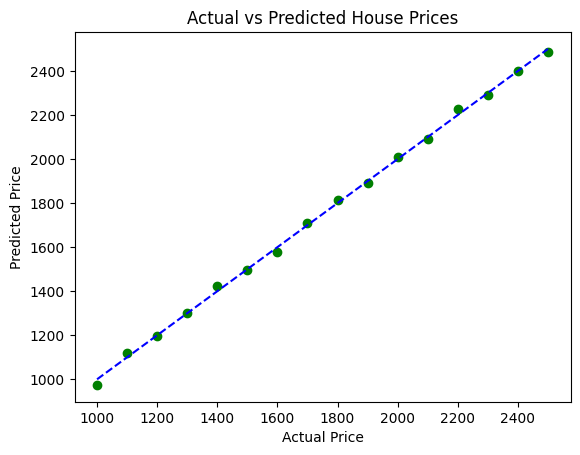

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualisation of Actual VS Predicted house prices

plt.scatter(y, y_final_pred, color="green")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "b--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()
plt.savefig("Output_2.1.png")

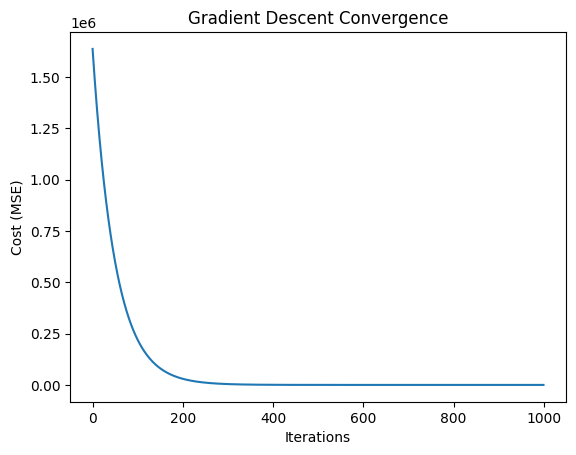

In [ ]:
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.show()

In [ ]:
#Values can be inputted in the model to get the predicted House price!

new_house = np.array([[0, 0]])
new_house[0][0] = int(input("House area: "))
new_house[0][1] = int(input("Number of rooms in house: "))

# We have to scale the fetures first!
new_house_scaled = (new_house - x_mean) / x_std


#Add bias
new_house_b = np.hstack((np.ones((1, 1)), new_house_scaled))


predicted_price = new_house_b @ theta


print("Predicted House Price:", predicted_price[0][0])

House area: 3000
Number of rooms in house: 12
Predicted House Price: 1002.5927713476135
